In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [4]:
d1 = pd.read_csv("/Users/tejonandinibaddula/Documents/datasets/heart.csv")
d2 = pd.read_csv("/Users/tejonandinibaddula/Documents/datasets/o2Saturation.csv")
print(d1.head(3))
print(d2.head(3))

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
   98.6
0  98.6
1  98.6
2  98.6


Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

(Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic)

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

(Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack



In [5]:
#combining d1 and d2 into a single dataframe
df = d1.merge(d2,left_index=True, right_index=True)
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6


In [6]:
#checking for null values
df.isna().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
98.6        False
dtype: bool

The dataset does not have any null values

In [7]:
#renaming the columns
df.rename(columns = {'98.6':'o2saturation'},inplace=True)
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6


In [8]:
#reindexing the columns
df.columns
new_index = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'o2saturation', 'output']
df = df.reindex(columns=new_index)
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,o2saturation,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,98.6,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,98.6,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,98.6,1


<AxesSubplot:>

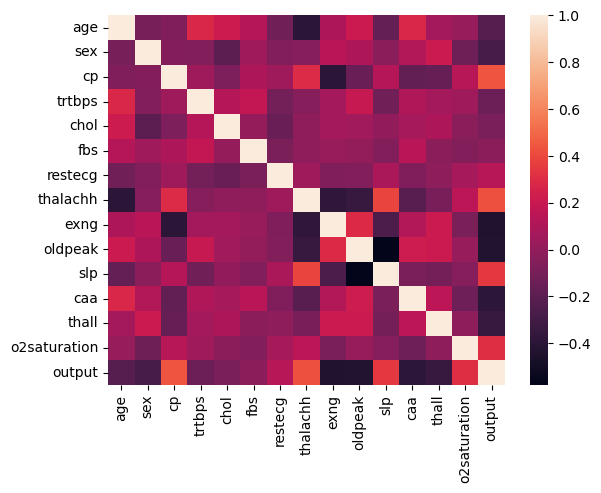

In [83]:
sns.heatmap(df.corr())

In [9]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='o2saturation', ylabel='count'>

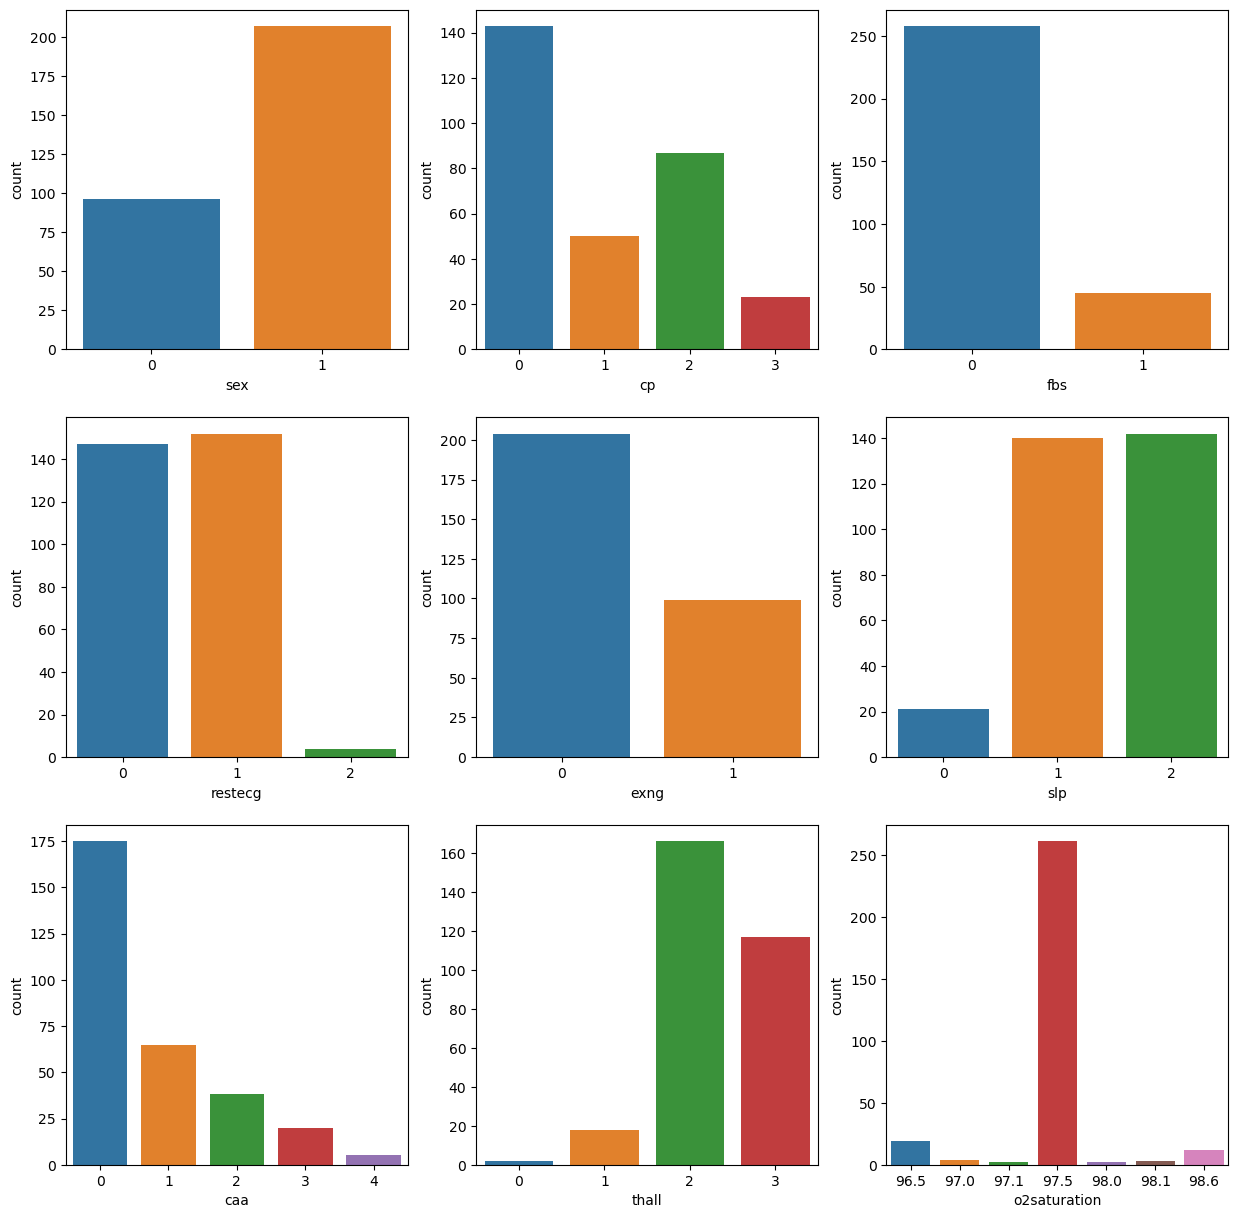

In [10]:
#Count of categorical features against output
fig,axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

sns.countplot(df.sex, data=df, ax=axs[0, 0])
sns.countplot(df.cp, data=df, ax=axs[0, 1])
sns.countplot(df.fbs, data=df, ax=axs[0, 2])
sns.countplot(df.restecg, data=df, ax=axs[1, 0])
sns.countplot(df.exng, data=df, ax=axs[1, 1])
sns.countplot(df.slp, data=df, ax=axs[1, 2])
sns.countplot(df.caa, data=df, ax=axs[2, 0])
sns.countplot(df.thall, data=df, ax=axs[2, 1])
sns.countplot(df.o2saturation, data=df, ax=axs[2, 2])

In [11]:
#Modelling 

x = df.drop(columns="output")
y = df['output']

In [13]:
#Splitting the data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [14]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
x_train = scaling.fit_transform(x_train)
x_test = scaling.transform(x_test)

print(len(x_test)) 

61


In [110]:
#Logistic Regression:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=10) #creating an object

lr.fit(x_train,y_train) #fitting into logistic regression model

y_pred_lr=lr.predict(x_test) #prediction using logistic regression

print(accuracy_score(y_test,y_pred_lr)) #finding the accuracy

0.8360655737704918


In [15]:
#Decision Tree:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = "entropy",random_state=10,max_depth=3,min_samples_leaf=5) #creating an object

dt.fit(x_train,y_train)

y_pred_dt = dt.predict(x_test)

print(accuracy_score(y_test,y_pred_dt))

0.7377049180327869


In [116]:
# K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7, p=2,metric='euclidean')

knn.fit(x_train,y_train)

y_pred_knn = knn.predict(x_test)

print(accuracy_score(y_test,y_pred_knn))

0.819672131147541


In [118]:
#Support Vector Machine

from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(x_train,y_train)

y_pred_svm = sv.predict(x_test)

print(accuracy_score(y_test,y_pred_svm))

0.8524590163934426


In [119]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20,random_state=10)

rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

print(accuracy_score(y_test,y_pred_rf))

0.7868852459016393


In [20]:
#Ada Boosting algorithm

from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(base_estimator = dt, n_estimators = 400, learning_rate=1)

ab.fit(x_train,y_train)

y_pred_ab = ab.predict(x_test)

print(accuracy_score(y_test,y_pred_ab))

0.8524590163934426
